## Data
https://www.kaggle.com/c/facial-keypoints-detection/overview

## Code
https://cfml.se/blog/facial_landmark_detection/

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import PIL 
from keras.models import load_model, model_from_json

In [ ]:
data = pd.read_csv("/content/data/training.csv")

In [ ]:
len(data)

7049

In [ ]:
data.head(1)

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...


In [ ]:
data = data.dropna()

In [ ]:
len(data)

2140

In [ ]:
data.columns

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y', 'Image'],
      dtype='object')

In [ ]:
type(data['Image'].head(1).values)

numpy.ndarray

In [ ]:
# get the labels
# Extract labels representing the coordinates of facial landmarks
Y_data = data[data.columns[:-1]].values

In [ ]:
Y_data[0]

array([66.03356391, 39.00227368, 30.22700752, 36.4216782 , 59.58207519,
       39.64742256, 73.13034586, 39.96999699, 36.35657143, 37.3894015 ,
       23.45287218, 37.3894015 , 56.95326316, 29.03364812, 80.22712782,
       32.22813835, 40.22760902, 29.0023218 , 16.35637895, 29.64747068,
       44.42057143, 57.06680301, 61.19530827, 79.97016541, 28.61449624,
       77.38899248, 43.3126015 , 72.93545865, 43.13070677, 84.48577444])

In [ ]:
# Normalize coordinates to (0, 1) range
Y_data = Y_data / 96
Y_data = Y_data.astype("float32")

In [ ]:
Y_data[0]

array([0.68784964, 0.4062737 , 0.31486467, 0.37939247, 0.6206466 ,
       0.412994  , 0.7617744 , 0.41635415, 0.3787143 , 0.38947293,
       0.24430075, 0.38947293, 0.59326315, 0.30243385, 0.83569926,
       0.33570978, 0.41903758, 0.3021075 , 0.17037895, 0.30882782,
       0.46271428, 0.5944459 , 0.6374511 , 0.83302253, 0.29806766,
       0.80613536, 0.45117292, 0.75974435, 0.4492782 , 0.88006014],
      dtype=float32)

In [ ]:
len(data)

2140

In [ ]:
data['Image'].head(1).values

array(['238 236 237 238 240 240 239 241 241 243 240 239 231 212 190 173 148 122 104 92 79 73 74 73 73 74 81 74 60 64 75 86 93 102 100 105 109 114 121 127 132 134 137 137 140 139 138 137 137 140 141 143 144 147 148 149 147 147 148 145 147 144 146 147 147 143 134 130 130 128 116 104 98 90 82 78 85 88 86 80 77 87 108 111 115 128 133 188 242 252 250 248 251 250 250 250 235 238 236 238 238 237 238 242 241 239 237 233 215 195 187 156 119 103 93 78 68 73 75 75 72 75 70 61 66 77 91 96 106 108 113 120 125 131 134 138 135 138 139 145 144 144 142 140 141 141 148 147 150 149 152 151 149 150 147 148 144 148 144 146 146 143 139 128 132 135 128 112 104 97 87 78 79 83 85 83 75 75 89 109 111 117 117 130 194 243 251 249 250 249 250 251 237 236 237 238 237 238 241 238 238 238 241 221 195 187 163 124 106 95 81 68 70 73 73 72 73 69 65 74 82 94 103 110 111 119 127 135 140 139 144 144 145 143 143 143 146 144 144 147 146 148 147 150 146 147 150 150 149 147 147 144 147 144 149 146 144 144 144 140 131 133 133 1

In [ ]:
# Convert the rows of the image column from pixel values separated by spaces to numpy arrays
data["Image"] = data["Image"].apply(lambda img: np.fromstring(img, sep=" "))
data['Image'].head(1).values

array([array([238., 236., 237., ...,  70.,  75.,  90.])], dtype=object)

In [ ]:
data['Image'].iloc[407].shape

(9216,)

In [ ]:
96 * 96

9216

In [ ]:
# Create numpy matrix from image column by stacking the rows vertically
X_data = np.vstack(data["Image"].values)

# Normalize pixel values to (0, 1) range
X_data = X_data / 255

# Convert to float32, which is the default for Keras
X_data = X_data.astype("float32")

# Reshape each row from one dimensional arrays to (height, width, num_channels) = (96, 96, 1)
X_data = X_data.reshape(-1, 96, 96, 1)

In [ ]:
X_data[0]

array([[[0.93333334],
        [0.9254902 ],
        [0.92941177],
        ...,
        [0.98039216],
        [0.98039216],
        [0.98039216]],

       [[0.92156863],
        [0.93333334],
        [0.9254902 ],
        ...,
        [0.9764706 ],
        [0.98039216],
        [0.9843137 ]],

       [[0.92941177],
        [0.9254902 ],
        [0.92941177],
        ...,
        [0.9843137 ],
        [0.9843137 ],
        [0.98039216]],

       ...,

       [[0.7294118 ],
        [0.7176471 ],
        [0.70980394],
        ...,
        [0.20392157],
        [0.22352941],
        [0.23529412]],

       [[0.7411765 ],
        [0.7372549 ],
        [0.8117647 ],
        ...,
        [0.23921569],
        [0.27058825],
        [0.30588236]],

       [[0.7490196 ],
        [0.72156864],
        [0.72156864],
        ...,
        [0.27450982],
        [0.29411766],
        [0.3529412 ]]], dtype=float32)

In [ ]:
split_index = int(X_data.shape[0] * 0.8)
X_train = X_data[:split_index]
Y_train = Y_data[:split_index]
X_val = X_data[split_index:]
Y_val = Y_data[split_index:]

# Train the CNN Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPool2D, Dropout

In [ ]:
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(96, 96, 1), activation="relu", padding="same"))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64, (5, 5), activation="relu", padding="same"))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(128, (5, 5), activation="relu", padding="same"))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(512, activation="relu"))
model.add(Dense(30))
model.compile(optimizer="adam", loss="mean_squared_error")

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 96, 96, 32)        832       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 48, 48, 64)        51264     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 24, 24, 128)       204928    
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 12, 12, 128)     

In [ ]:
history = model.fit(X_data, Y_data, batch_size=200, epochs=4, validation_data=(X_val, Y_val))

Epoch 1/4
11/11 [==============================] - 3s 89ms/step - loss: 0.0998 - val_loss: 0.0247
Epoch 2/4
11/11 [==============================] - 1s 65ms/step - loss: 0.0147 - val_loss: 0.0066
Epoch 3/4
11/11 [==============================] - 1s 63ms/step - loss: 0.0049 - val_loss: 0.0039
Epoch 4/4
11/11 [==============================] - 1s 64ms/step - loss: 0.0022 - val_loss: 0.0024


In [ ]:
final_train_loss = model.evaluate(X_data, Y_data, verbose=0)
final_val_loss = model.evaluate(X_val, Y_val, verbose=0)

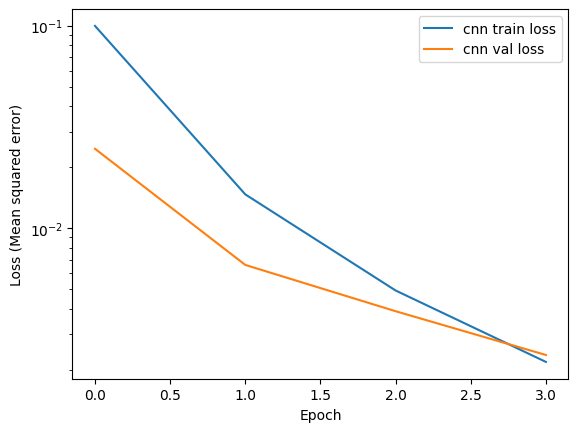

In [ ]:
plt.plot(history.epoch, np.array(history.history["loss"]), label="cnn train loss")
plt.plot(history.epoch, np.array(history.history["val_loss"]), label="cnn val loss")
plt.xlabel("Epoch")
plt.ylabel("Loss (Mean squared error)")
plt.legend()
plt.yscale("log")
plt.savefig("output/cnn", bbox_inches="tight")

In [ ]:
# save model
model.save_weights("/content/output/saved_models/cnn_model_weights.h5")
with open("/content/output/saved_models/cnn_model_architecture.json", "w") as f:
            f.write(model.to_json())

# Add Sunglasses Filter to webcame

In [3]:
# load model 
with open("saved_models/cnn_model_architecture.json", "r") as f:
      model = model_from_json(f.read())
model.load_weights("saved_models/cnn_model_weights.h5")

In [15]:
# Capture video from the default camera
cap = cv2.VideoCapture(0)

 # Loop through video frames
while True:

        # Read the current frame
        ret, frame = cap.read()

        # Convert the frame to a PIL Image object
        whole_image = Image.fromarray(frame)
        
        
        # Detect faces in the current frame using the Haar cascade classifier
        face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
        faces = face_cascade.detectMultiScale(frame, 1.3, 5)

       # If one or more faces are detected
        if len(faces) > 0:
            for face in faces:
                 # Get the coordinates and dimensions of the face
                (x,y,w,h) = face
                
                # Extract the face region from the current frame
                image_face = frame[y:y + h, x:x + w]
                image_width = image_face.shape[1]
                image_height = image_face.shape[0]

                # Resize and reshape the face image to match the input dimensions of the model
                scaled = (cv2.cvtColor(image_face, cv2.COLOR_BGR2GRAY)/255)
                rehaped = scaled.reshape((1, scaled.shape[1], scaled.shape[0]))
                resized = np.resize(rehaped,(1,96,96))

                # Use the model to predict facial landmarks
                y_pred = model.predict(resized)


                landmarks = []

                for i in range(0, 30, 2):
                    landmark_x, landmark_y = (y_pred[0][i]*image_height)+x , (y_pred[0][i+1]*image_width)+y
                    landmarks.append((landmark_x, landmark_y)) 

                # Extract relevant facial landmarks for positioning the sunglasses
                left_eye_center_x = int(landmarks[0][0])
                left_eye_center_y = int(landmarks[0][1])
                right_eye_center_x = int(landmarks[1][0])
                right_eye_center_y = int(landmarks[1][1])
                left_eye_outer_x = int(landmarks[3][0])
                left_eye_outer_y = int(landmarks[3][1])
                right_eye_outer_x = int(landmarks[5][0])
                right_eye_outer_y = int(landmarks[5][1])
                right_eyebrow_outer_y = int(landmarks[6][1])
                right_eyebrow_outer_x = int(landmarks[5][0])
                

                # Load the sunglasses image
                sunglasses_img = Image.open("sunglasses.png")
                

                # Resize the sunglasses image to fit the face
                sunglasses_width = left_eye_outer_x - right_eye_outer_x+30
                sunglasses_height = right_eye_outer_y - right_eyebrow_outer_y +15
                sunglasses_resized = sunglasses_img.resize((sunglasses_width, sunglasses_height))
                
      
                # Compute the angle between the eyes to rotate the sunglasses image
                eye_angle_radians = np.arctan((right_eye_center_y - left_eye_center_y) / (left_eye_center_x - right_eye_center_x))
                sunglasses_rotated = sunglasses_resized.rotate(np.degrees(eye_angle_radians), expand=True, resample=Image.BICUBIC)

                # Compute positions such that the center of the sunglasses is positioned at the center point between the eyes
                x_offset = int(sunglasses_width * 0.5)
                y_offset = int(sunglasses_height * 0.5)
                pos_x = int((left_eye_center_x + right_eye_center_x) / 2) - x_offset
                pos_y = int((left_eye_center_y + right_eye_center_y) / 2) - y_offset


                # Paste sunglasses on face image
                #"whole_image" is an Image object that contains the frame with the glasses
                whole_image.paste(sunglasses_rotated, (pos_x, pos_y), sunglasses_rotated)
            
            # Convert the resulting Image object to an RGB numpy array
            with_filter = cv2.cvtColor(np.array(whole_image), cv2.COLOR_RGB2BGR)
            with_filter = cv2.cvtColor(np.array(with_filter), cv2.COLOR_BGR2RGB)

            # Show the final image in a window titled "filter"
            cv2.imshow("filter", with_filter)
            
             # Wait for a key press event
            if cv2.waitKey(1) & 0xFF == ord('e'):
                break
                


        else:
            continue
    

1/1 [==============================] - 0s 20ms/step
